# COMMUNITY PROJECT 

This community project initially began from community diagnosis which composed of 4 components including
- Size of problem : gotten from secondary data
- Severity of problem : individual experience and primary data
- Feasibility : primary care resources
- Concerning : primary data

In [1]:
# BASIC TOOLS
import numpy as np
import pandas as pd
import datetime as dt

# STATISTIC TOOLS
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import pingouin as pg 
import statsmodels.formula.api as smf
from lifelines import KaplanMeierFitter, NelsonAalenFitter, CoxPHFitter

# PRE - PROCESSING TOOLS 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# SUPERVISED LEARNING TOOLS
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# UNSUPERVISED LEARNING TOOLS
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA, NMF

# DEEP LEARNING TOOLS 
from sklearn.neural_network import MLPRegressor, MLPClassifier

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# FIRST SECONDARY DATA FOR SIZE OF PROBLEM

## IMPORT DATA

In [2]:
xls = pd.ExcelFile('D:\\Users\\Desktop\\โครงการ\\CommunityProject\\CommunityProject.xlsx')
print(xls.sheet_names)

['dependent']


OPEN DEPENDENT PATIENT DATA (SECONDARY DATA FOR SIZE OF PROBLEM)

In [3]:
dependent = xls.parse('dependent')
dependent = dependent.iloc[:, 1:]
dependent

,Age,Sex,ADL,HT,DM,Stroke,CKD,Dementia,COPD,Head_injury,Cancer,Congenital,Hipfracture,Osteoporosis,Psychi,Weakness,Fraility
0,89,M,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0.0
1,82,F,6,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0
2,72,M,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
3,76,F,6,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0
4,86,F,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0
5,74,M,6,1,1,0,0,0,0,0,0,0,0,0,0,0,1.0
6,95,F,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1.0
7,65,F,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
8,90,F,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0
9,78,F,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0


## UNDERSTAND THE DATA

In [4]:
dependent.info()
dependent.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           39 non-null     int64  
 1   Sex           39 non-null     object 
 2   ADL           39 non-null     int64  
 3   HT            39 non-null     int64  
 4   DM            39 non-null     int64  
 5   Stroke        39 non-null     int64  
 6   CKD           39 non-null     int64  
 7   Dementia      39 non-null     int64  
 8   COPD          39 non-null     int64  
 9   Head_injury   39 non-null     int64  
 10  Cancer        39 non-null     int64  
 11  Congenital    39 non-null     int64  
 12  Hipfracture   39 non-null     int64  
 13  Osteoporosis  39 non-null     int64  
 14  Psychi        39 non-null     int64  
 15  Weakness      39 non-null     int64  
 16  Fraility      38 non-null     float64
dtypes: float64(1), int64(15), object(1)
memory usage: 5.3+ KB


Age             0
Sex             0
ADL             0
HT              0
DM              0
Stroke          0
CKD             0
Dementia        0
COPD            0
Head_injury     0
Cancer          0
Congenital      0
Hipfracture     0
Osteoporosis    0
Psychi          0
Weakness        0
Fraility        1
dtype: int64

## DATA CLEANING

QUERY THE ELDERLY

In [5]:
elderly = dependent[dependent['Age'] >= 60]
elderly

,Age,Sex,ADL,HT,DM,Stroke,CKD,Dementia,COPD,Head_injury,Cancer,Congenital,Hipfracture,Osteoporosis,Psychi,Weakness,Fraility
0,89,M,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0.0
1,82,F,6,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0
2,72,M,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
3,76,F,6,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0
4,86,F,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0
5,74,M,6,1,1,0,0,0,0,0,0,0,0,0,0,0,1.0
6,95,F,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1.0
7,65,F,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
8,90,F,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0
9,78,F,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0


CATEGORIZE SEVERITY OF DEPENDENCE BY ADL

In [6]:
Dependent_level = []
for index, rows in elderly.iterrows() : 
    if rows['ADL'] >= 12 :
        Dependent_level.append('no')
    elif rows['ADL'] >= 9 and rows['ADL'] <= 11 :
        Dependent_level.append('mild_to_moderate')
    elif rows['ADL'] >= 5 and rows['ADL'] <= 8 :
        Dependent_level.append('severe')
    else :
        Dependent_level.append('total')
elderly['Dependent_level'] = np.array(Dependent_level)
elderly

C:\Users\USER\AppData\Local\Temp\ipykernel_14692\1738269779.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elderly['Dependent_level'] = np.array(Dependent_level)


,Age,Sex,ADL,HT,DM,Stroke,CKD,Dementia,COPD,Head_injury,Cancer,Congenital,Hipfracture,Osteoporosis,Psychi,Weakness,Fraility,Dependent_level
0,89,M,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0.0,severe
1,82,F,6,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,severe
2,72,M,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,total
3,76,F,6,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0,severe
4,86,F,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,severe
5,74,M,6,1,1,0,0,0,0,0,0,0,0,0,0,0,1.0,severe
6,95,F,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1.0,total
7,65,F,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,severe
8,90,F,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,total
9,78,F,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,severe


## DATA ANALYSIS

In [7]:
sns.set_style('whitegrid')

LEVEL OF DEPENDENCY 

severe    16
total     14
Name: Dependent_level, dtype: int64


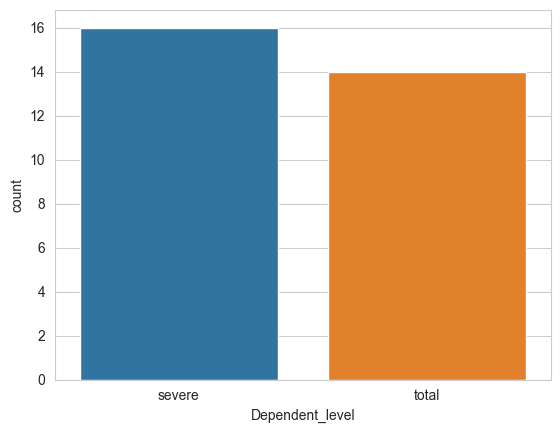

Dependent_level  Fraility
severe           1.0         9
                 0.0         7
total            1.0         8
                 0.0         5
Name: Fraility, dtype: int64


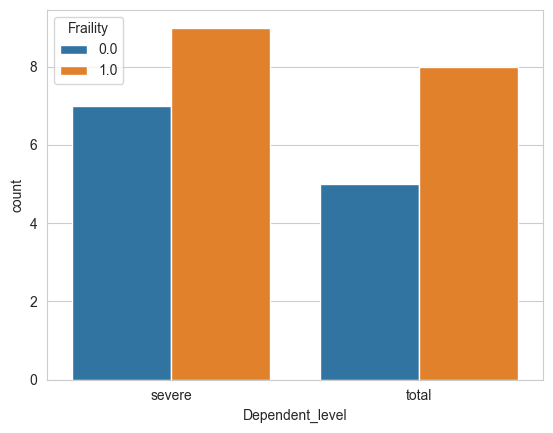

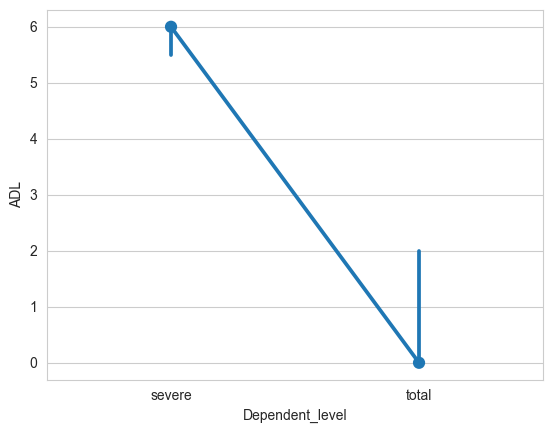

In [13]:
number_of_dependency = elderly['Dependent_level'].value_counts()
print(number_of_dependency)

sns.countplot(data = elderly, x = 'Dependent_level')
plt.show()

dependency_fraility = elderly.groupby('Dependent_level')['Fraility'].value_counts()
print(dependency_fraility)

sns.countplot(data = elderly, x = 'Dependent_level', hue = 'Fraility')
plt.show()

sns.pointplot(data = elderly, x = 'Dependent_level', y = 'ADL', join = True, estimator = 'median')
plt.show()

AGE & GENDER

Dependent_level
severe    76.125000
total     76.857143
Name: Age, dtype: float64


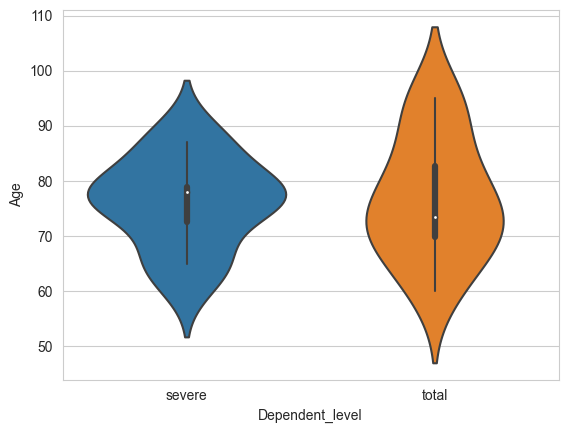

Sex              M   F
Dependent_level       
severe           5  11
total            9   5


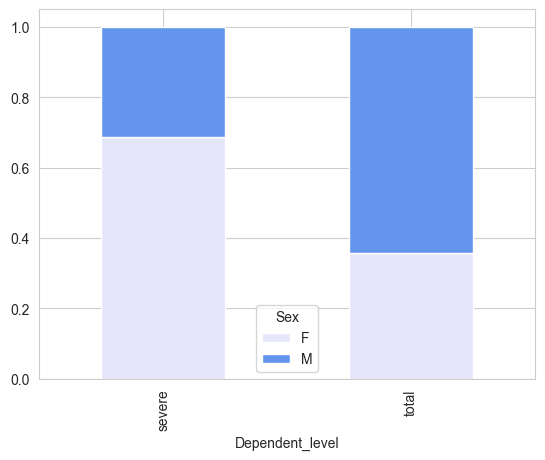

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  2.081274  1.0  0.149116  0.263393  0.302806
1        cressie-read  0.666667  2.085786  1.0  0.148676  0.263678  0.303350
2      log-likelihood  0.000000  2.103417  1.0  0.146970  0.264790  0.305474
3       freeman-tukey -0.500000  2.124380  1.0  0.144971  0.266106  0.307995
4  mod-log-likelihood -1.000000  2.152234  1.0  0.142363  0.267845  0.311342
5              neyman -2.000000  2.229857  1.0  0.135366  0.272633  0.320637


Median age association between gender and dependent level


Dependent_level,severe,total
Sex,,
M,78,73
F,78,90


In [9]:
age_dependent = elderly.groupby('Dependent_level')['Age'].mean()
print(age_dependent)
sns.violinplot(data = elderly, x = 'Dependent_level', y = 'Age', whis = [0,100])
plt.show()

gender_dependent = elderly.groupby('Dependent_level')['Sex'].value_counts().unstack()
gender_dependent = gender_dependent.sort_index(axis = 1, ascending = False)
print(gender_dependent)

gender_dependent = elderly.groupby('Dependent_level')['Sex'].value_counts(normalize = True).unstack()
gender_dependent.plot(kind = 'bar', stacked = True, color = ['lavender', 'cornflowerblue', 'navy'])
expected, observed, stats = pg.chi2_independence(data = elderly, x = 'Dependent_level', y = 'Sex')
plt.show()
print(stats)

print()
print()
age_between_gender_dependent = elderly.pivot_table(values = 'Age', index = 'Sex', columns = 'Dependent_level', aggfunc = np.median, margins = False, fill_value = 0)
age_between_gender_dependent = age_between_gender_dependent.sort_index(axis = 0, ascending = False)
print('Median age association between gender and dependent level')
age_between_gender_dependent


COUNT EACH UNDERLYING CONDITION

In [10]:
columns = elderly.columns
columns = columns[3:-1]
print(columns)

for i in columns :
    print(elderly[i].value_counts())

Index(['HT', 'DM', 'Stroke', 'CKD', 'Dementia', 'COPD', 'Head_injury',
       'Cancer', 'Congenital', 'Hipfracture', 'Osteoporosis', 'Psychi',
       'Weakness', 'Fraility'],
      dtype='object')
0    16
1    14
Name: HT, dtype: int64
0    22
1     8
Name: DM, dtype: int64
0    22
1     8
Name: Stroke, dtype: int64
0    26
1     4
Name: CKD, dtype: int64
0    29
1     1
Name: Dementia, dtype: int64
0    29
1     1
Name: COPD, dtype: int64
0    30
Name: Head_injury, dtype: int64
0    29
1     1
Name: Cancer, dtype: int64
0    29
1     1
Name: Congenital, dtype: int64
0    30
Name: Hipfracture, dtype: int64
0    29
1     1
Name: Osteoporosis, dtype: int64
0    29
1     1
Name: Psychi, dtype: int64
0    29
1     1
Name: Weakness, dtype: int64
1.0    17
0.0    12
Name: Fraility, dtype: int64
